In [52]:
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
from sklearn import preprocessing

dataset = df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', # Path menuju berkas dataset, dapat berupa path lokal maupun remote
    header=None # Baris pertama dataset bukanlah header
)
# change data categorical to numerical
le = preprocessing.LabelEncoder()
dataset[4] = le.fit_transform(dataset[4])
display(dataset.head())
print(dataset.shape)


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


(150, 5)


In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# dimension reduction
dataset_std = StandardScaler().fit_transform(dataset)
pca = PCA(n_components=2)
skl_pca = pca.fit_transform(dataset_std)
print(skl_pca.shape)

(150, 2)


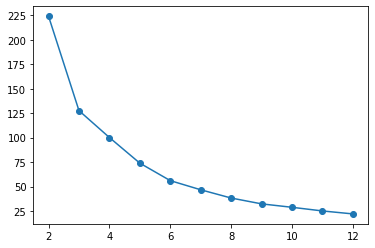

In [55]:
from sklearn.cluster import KMeans

# see optimum cluster with elbow method
cluster_range = [2,3,4,5,6,7,8,9,10,11,12]
point_inertia = []
for n in cluster_range:
    kmeans = KMeans(n_clusters=n, init='k-means++', n_init=10, random_state=0).fit(skl_pca)
    point_inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(cluster_range, point_inertia, marker='o')
plt.show()

In [56]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=100, random_state=0)
label = kmeans.fit_predict(skl_pca)

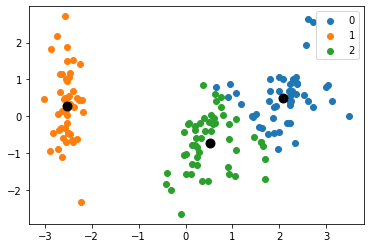

In [57]:
import numpy as np
import matplotlib.pyplot as plt 

u_labels = np.unique(label)
centroids = kmeans.cluster_centers_
# source https://www.askpython.com/python/examples/plot-k-means-clusters-python
 #plotting the results:
for i in u_labels:
    plt.scatter(skl_pca[label == i , 0] , skl_pca[label == i , 1], label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()